<img src="./img/Logo.jpg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

## Juan Manuel Ronchetti

# Trabajo Semanal 3

## Dada la siguiente plantilla:
<img src="./img/Plantilla.png" /> 

### Se pide:
1) Obtener la transferencia para máxima planicidad en la banda de paso utilizando los conceptos de partes de función. 
 
2) Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia.

3) Implementar el circuito normalizado con estructuras pasivas separadas mediante buffers.

4) Obtenga el circuito que cumpla con la plantilla requerida si dispone de capacitores de 100nf.

5) Proponga una red que se comporte igual a la hallada en 4) pero con resistores, capacitores y opamps.

6) Proponer un planteo alternativo usando la ωButter

## 1) Obtencion de la transferencia

In [1]:
from IPython.display import IFrame
IFrame("./TS3_1.pdf", width=900, height=1200)

<img src="./img/Transformacion.jpg"  width=650 /> 
<img src="./img/Transferencia.jpg"  width=650 /> 

Como se observa de la deduccion en papel, la transferencia resulta:
\begin{equation} T(s) = \frac{1,566}{s^2 + s 1,254 + 1,566} \cdot \frac{1,255}{s + 1,255} \end{equation}

Se observa que se obtuvo el filtro pasabajos solicitado. Si se considera la parametrizacion en funcion de $\omega_0$ y $Q$:
\begin{equation} T(s) = \frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2} \cdot \frac{\omega_0}{s+\omega_0} \end{equation}

Resultan $\omega_0 = 1,255$ y $Q \approx 1 $

## 2) Diagrama de polos y ceros y respuesta en frecuencia

<img src="./img/Diagramas2.jpg"  width=650 /> 

### Simulacion numérica

A continuacion se observa la simulacion de la transferencia en python, donde se comprueba que los resultados fueron exitosos:

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

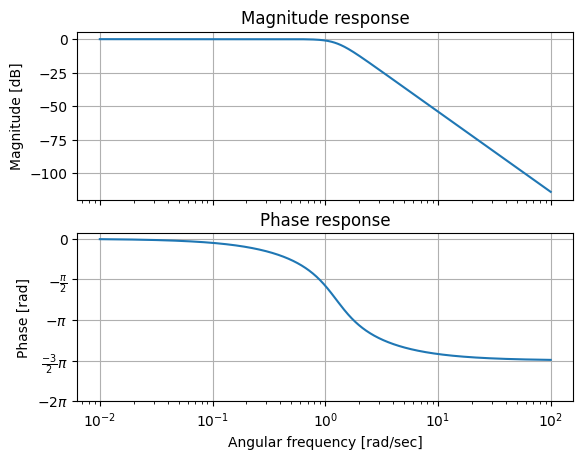

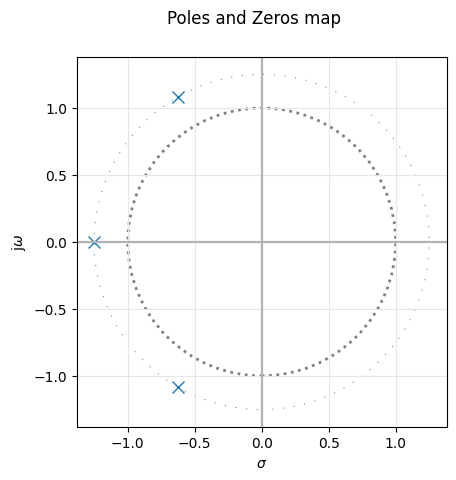

In [1]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

plt.close('all')

w02 = 1.965

my_tf = TransferFunction( [w02], [1, 2.509, 3.14, w02] )

bodePlot(my_tf, fig_id=1 )

pzmap(my_tf, fig_id=2) 

## 3) Implementacion normalizada con estructuras pasivas

Para la implementacion, se emplearon un circuito RLC y un circuito RC en cascada para obtener la transferencia de tercer orden hallada:
<img src="./img/Normalizacion.png"  width=650 />

Se definió $C=1$ a fin de facilitar la implementacion en el item 4). Con los valores obtenidos, el circuito construido resulta:

<img src="./img/Circuito_Normalizado.png"  width=650 /> 

### Simulacion circuital

A continuacion se observan los resultados de la simulacion circuital:
<img src="./img/Respuesta_Normalizada.png"  width=650 /> 

Se observa una frecuencia de corte de $160mHz$, la cual corresponde a $1\frac{rad}{s}$, por lo que el resultado fue exitoso. 

## 4) Implementacion con capacitores de $100nF$

A partir de la red normalizada, se aplicaron las ecuaciones de desnormalizacion para obtener los valores de los componentes, tomando como partida el uso de capacitores de 100nF:

* $C = 100nF = 1 \cdot \frac{1}{\Omega_\omega \cdot \Omega_z}$

de donde se obtiene $\Omega_z = \frac{1}{\Omega_\omega \cdot 100nF} = \frac{1}{2\pi1500Hz \cdot 100nF} \approx 1060\Omega$

* $R = 0.8 \cdot \Omega_z \approx 850\Omega$
* $L = 0.64 \cdot \frac{\Omega_z}{\Omega_\omega} \approx 72 mHy$

Se construyó en LTSpice el circuito obtenido:

<img src="./img/Circuito_Desnormalizado.png"  width=650 /> 

El resultado de la simulacion fue el siguiente:

<img src="./img/Respuesta_Desnormalizada.png"  width=650 /> 

Se observa la frecuencia de corte buscada de $1.5 kHz$, por lo tanto el diseño fue exitoso. 

## 5) Implementacion con FDNR

En esta seccion se busco implementar la misma transferencia pero utilizando unicamente resistores, capacitores y opamps.
Debido a que el inductor se encuentra flotante, no es posible utilizar un girador, por ende se realizó el reemplazo utilizando un FDNR (Frequency dependent negative resistor) mediante el GIC de Antoniu.

El desarrollo mediante el cual se hizo el reemplazo se muestra a continuacion:

<img src="./img/FDNR.png"  width=650 /> 

### Circuito Normalizado
El circuito normalizado resulta entonces:

<img src="./img/Circuito_FDNR.png"  width=650 /> 

<img src="./img/Respuesta_FDNR_1.png"  width=650 /> 

Se observa en la simulacion que se obtuvo el resultado esperado, por ende el reemplazo del inductor fue exitoso.

### Circuito Desnormalizado
Aplicando las ecuaciones de desnormalizacion resulta:

<img src="./img/Circuito_FDNR_2.png"  width=650 /> 

<img src="./img/Respuesta_FDNR_2.png"  width=650 /> 

Nuevamente se observa que se obtuvo el resultado esperado en la simulacion.

## 6) Planteo con $\Omega_B$

En esta seccion se busco obtener el mismo filtro, pero planteandolo utilizando la norma de Butterworth:
\begin{equation} \Omega_B = \Omega_\omega \cdot \xi^{\frac{-1}{n}} \end{equation} 
Aplicando esta norma, es posible resolver el filtro de maxima planicidad como si se tratara del caso especial del Butterworth. El prodecimiento se muestra a continuacion:

<img src="./img/NormaButter.jpg"  width=650 /> 

Al tratarse de $\omega_0 = 1$, el circuito normalizado en este caso resulta: 

<img src="./img/Circuito_NormalizadoButter.png"  width=650 /> 

Y como se observa en el desarrollo, aplicando la norma de Butterworth se obtuvieron los mismos valores para componentes que en la seccion 3), y por ende la misma respuesta en frecuencia. 

<img src="./img/Circuito_Desnormalizado.png"  width=650 /> 

### Conclusiones

Se concluye entonces que el diseño aplicando la norma de Butterworth fue exitoso, y conforma un metodo practico mas rapido y sencillo para resolver filtros de maxima planicidad.